## Apress - Industrialized Machine Learning Examples

Andreas Francois Vermeulen
2019

### This is an example add-on to a book and needs to be accepted as part of that copyright.

# Chapter 004 Example 005B

 Using Least-angle regression (LARS) is an algorithm for fitting linear regression models to high-dimensional data

## Part A - Load libraries

In [1]:
from sklearn import linear_model

import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
%matplotlib inline

## Part B - Load Data

In [2]:
fileName = '../../Data/Sickness04.csv'
fileFullName = os.path.abspath(fileName)
print(fileFullName)

C:\Users\AndreVermeulen\Documents\My Book\apress\Industrial Machine Learning\book\GitHub\Upload\industrial-machine-learning\Data\Sickness04.csv


In [3]:
sickdf= pd.read_csv(fileFullName,header=0)
print(sickdf.shape)
print(sickdf.columns)

(442, 11)
Index(['F01', 'F02', 'F03', 'F04', 'F05', 'F06', 'F07', 'F08', 'F09', 'F10',
       'T'],
      dtype='object')


In [4]:
sickness = np.array(sickdf)
sickness_data = np.array(sickdf[['F01','F02','F03','F04','F05','F06','F07','F08','F09','F10']].copy(deep=True))
sickness_target = np.array(sickdf[['T'][0]].copy(deep=True))
X = sickness_data
y = sickness_target

## Part B - Compute the LARS algorithm

Computing regularization path using the LARS algorithm:
.

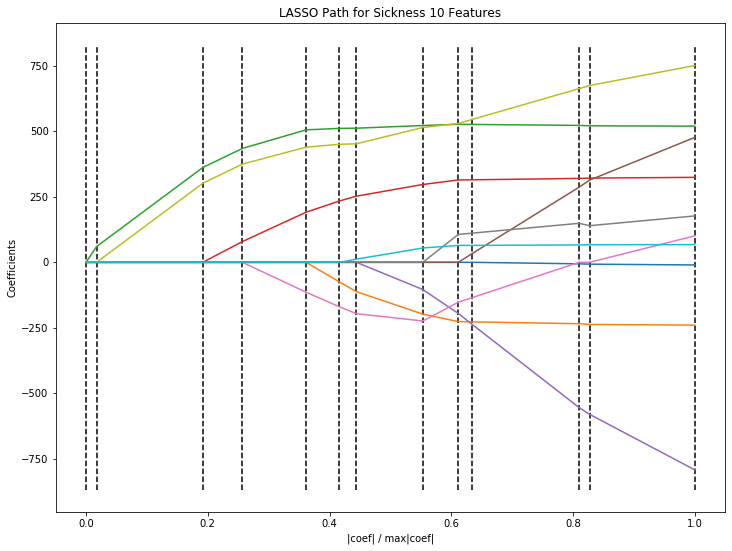

In [5]:
print("Computing regularization path using the LARS algorithm:")
alphas, _, coefs = linear_model.lars_path(X, y, method='lasso', verbose=True)

xx = np.sum(np.abs(coefs.T), axis=1)
xx /= xx[-1]

fig = plt.figure(figsize=(12, 9))
plt.plot(xx, coefs.T)
ymin, ymax = plt.ylim()
plt.vlines(xx, ymin, ymax, linestyle='dashed')
plt.xlabel('|coef| / max|coef|')
plt.ylabel('Coefficients')
plt.title('LASSO Path for Sickness 10 Features')
plt.axis('tight')
plt.show()

In [6]:
imagepath = os.path.join(*[os.path.dirname(os.path.dirname(os.getcwd())),'Results','Chapter 04'])
print(imagepath)

C:\Users\AndreVermeulen\Documents\My Book\apress\Industrial Machine Learning\book\GitHub\Upload\industrial-machine-learning\Results\Chapter 04


In [7]:
if not os.path.exists(imagepath):
    os.makedirs(imagepath)

In [8]:
imagename = os.path.join(*[os.path.dirname(os.path.dirname(os.getcwd())),'Results','Chapter 04','Chapter-004-Example-005B-01.jpg'])
fig.savefig(imagename, bbox_inches='tight')

In [9]:
import datetime
now = datetime.datetime.now()
print('Done!',str(now))

Done! 2019-10-19 17:20:17.656459
